# Coda.Br 2018 

## Conferência Brasileira de Jornalismo de Dados e métodos digitais
--------------------------------------------------------------------------------------

### *Iluminando o mar de dados - Uma introdução a Python para análise de dados*

##### Por *Caroline Dantas*

Nesse workshop vamos estudar como analisar um dataset público utilizando Python!! O dataset em questão é dos candidatos as Eleições Gerais de 2018, disponível no site do Tribunal Superior Eleitoral - [TSE](http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais).


#### Por que Python e não outra linguagem?

Python destaca-se pela rapidez em escrever programas relativamente pequenos, porém capazes de automatizar diversas tarefas, sem perder a robustez. Por ser uma linguagem de código aberto, a comunidade que a mantém tem grande comprometimento em manter as ferramentas atualizadas, a colocou como uma das principais para aplicações científicas, como a análise de dados.


### As ferramentas para análise de dados

##### IPython e Jupyter
Código interativo

##### pandas
Manipulação de dados

##### NumPy
Processamento numérico

##### matplolib
Visualização dos dados


### Iniciando nosso estudo

Começamos com a manipulação dos dados compreendendo o que temos no dataset onde será necessário a limpeza dos dados e/ou a padronização, para isso utilizaremos o *pandas*.

Faremos a importação da biblioteca para o nosso ambiente

In [1]:
import pandas as pd

## 1.0 Overview
----------------

Feita a importação, vamos agora ler o nosso dataset, e transforma-lo para um dataframe

In [2]:
dataframe = pd.read_csv('consulta_cand_2018_BRASIL.csv', delimiter=';', encoding='latin-1')

Agora iremos ver a apresentação dos dados, em um resumo das 5 primeiras linhas

In [3]:
dataframe.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,NR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO
0,30/10/2018,10:39:17,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,PARDA,169,COMERCIANTE,0,5,SUPLENTE,N,S,-1,6011428620186060000
1,30/10/2018,10:39:17,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,PARDA,999,OUTROS,0,5,SUPLENTE,N,N,-1,6044512320186130000
2,30/10/2018,10:39:17,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,PRETA,257,EMPRESÁRIO,0,5,SUPLENTE,N,S,-1,6009010420186100000
3,30/10/2018,10:39:17,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,PARDA,999,OUTROS,0,5,SUPLENTE,N,N,-1,6003259220186070000
4,30/10/2018,10:39:17,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,BRANCA,999,OUTROS,0,5,SUPLENTE,N,S,-1,6014104820186130000


Vimos que esse dataframe tem 58 colunas, porém não conseguimos ver todas nesse overview, vamos usar uma função para isso

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 58 columns):
DT_GERACAO                       29145 non-null object
HH_GERACAO                       29145 non-null object
ANO_ELEICAO                      29145 non-null int64
CD_TIPO_ELEICAO                  29145 non-null int64
NM_TIPO_ELEICAO                  29145 non-null object
NR_TURNO                         29145 non-null int64
CD_ELEICAO                       29145 non-null int64
DS_ELEICAO                       29145 non-null object
DT_ELEICAO                       29145 non-null object
TP_ABRANGENCIA                   29145 non-null object
SG_UF                            29145 non-null object
SG_UE                            29145 non-null object
NM_UE                            29145 non-null object
CD_CARGO                         29145 non-null int64
DS_CARGO                         29145 non-null object
SQ_CANDIDATO                     29145 non-null int64
NR_CANDIDATO     

In [5]:
dataframe[dataframe.NR_IDADE_DATA_POSSE == 825]


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,NR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO
15620,30/10/2018,10:39:17,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,BRANCA,999,OUTROS,-1,-1,#NULO#,N,N,-1,6002947720186140000


In [6]:
dataframe = dataframe.drop(dataframe.index[15620])

## 1.1 Quais colunas vamos analisar?
----

1. UE
2. UF
3. GÊNERO
4. IDADE DATA DA POSSE
5. COR RAÇA
6. CARGO
7. DESPESA MÁXIMA º
8. REELEIÇÃO
9. DECLARAR BENS

### 1.1.1 Vamos contabilizar os dados dessas colunas

In [7]:
SG_UE = dataframe.groupby('SG_UE')['SG_UE'].count()

In [8]:
SG_UE

SG_UE
AC     586
AL     461
AM     859
AP     667
BA    1196
BR      32
CE     913
DF    1262
ES     833
GO    1193
MA     796
MG    2378
MS     545
MT     541
PA     902
PB     621
PE    1094
PI     439
PR    1288
RJ    3699
RN     516
RO     658
RR     687
RS    1344
SC     788
SE     530
SP    3952
TO     364
Name: SG_UE, dtype: int64

In [9]:
DS_CARGO = dataframe.groupby('DS_CARGO')['DS_CARGO'].count()

In [10]:
DS_CARGO

DS_CARGO
1º SUPLENTE             385
2º SUPLENTE             394
DEPUTADO DISTRITAL      981
DEPUTADO ESTADUAL     17940
DEPUTADO FEDERAL       8588
GOVERNADOR              230
PRESIDENTE               16
SENADOR                 358
VICE-GOVERNADOR         236
VICE-PRESIDENTE          16
Name: DS_CARGO, dtype: int64

In [11]:
DS_GENERO = dataframe.groupby('DS_GENERO')['DS_GENERO'].count()

In [12]:
DS_GENERO

DS_GENERO
FEMININO      9211
MASCULINO    19933
Name: DS_GENERO, dtype: int64

In [13]:
NR_IDADE_DATA = dataframe.groupby('NR_IDADE_DATA_POSSE')['NR_IDADE_DATA_POSSE'].count()

In [14]:
DS_COR_RACA = dataframe.groupby('DS_COR_RACA')['DS_COR_RACA'].count()

In [15]:
DS_COR_RACA

DS_COR_RACA
AMARELA       168
BRANCA      15285
INDÍGENA      134
PARDA       10396
PRETA        3161
Name: DS_COR_RACA, dtype: int64

In [16]:
ST_REELEICAO = dataframe.groupby('ST_REELEICAO')['ST_REELEICAO'].count()

In [17]:
ST_REELEICAO

ST_REELEICAO
N    27790
S     1354
Name: ST_REELEICAO, dtype: int64

In [18]:
ST_DECLARAR_BENS = dataframe.groupby('ST_DECLARAR_BENS')['ST_DECLARAR_BENS'].count()

In [19]:
ST_DECLARAR_BENS

ST_DECLARAR_BENS
N    11314
S    17830
Name: ST_DECLARAR_BENS, dtype: int64

In [20]:
dataframe.loc[(dataframe["DS_GENERO"]=="FEMININO") & (dataframe["DS_COR_RACA"]=="PRETA"), ["DS_GENERO","DS_COR_RACA"]]

,DS_GENERO,DS_COR_RACA
31,FEMININO,PRETA
44,FEMININO,PRETA
56,FEMININO,PRETA
63,FEMININO,PRETA
119,FEMININO,PRETA
133,FEMININO,PRETA
160,FEMININO,PRETA
179,FEMININO,PRETA
180,FEMININO,PRETA
199,FEMININO,PRETA


### 1.1.2 Trabalhando com dados de duas colunas ao mesmo tempo

In [21]:
GENERO_RACA = pd.crosstab(dataframe.DS_GENERO, dataframe.DS_COR_RACA, margins=True)

In [22]:
GENERO_RACA

DS_COR_RACA,AMARELA,BRANCA,INDÍGENA,PARDA,PRETA,All
DS_GENERO,,,,,,
FEMININO,62,4698,49,3165,1237,9211
MASCULINO,106,10587,85,7231,1924,19933
All,168,15285,134,10396,3161,29144


In [23]:
CARGO_RACA = pd.crosstab(dataframe.DS_CARGO, dataframe.DS_COR_RACA, margins=True)

In [24]:
CARGO_RACA

DS_COR_RACA,AMARELA,BRANCA,INDÍGENA,PARDA,PRETA,All
DS_CARGO,,,,,,
1º SUPLENTE,1,239,3,116,26,385
2º SUPLENTE,2,223,4,126,39,394
DEPUTADO DISTRITAL,5,402,1,464,109,981
DEPUTADO ESTADUAL,98,8949,79,6854,1960,17940
DEPUTADO FEDERAL,59,4903,39,2650,937,8588
GOVERNADOR,2,149,2,55,22,230
PRESIDENTE,0,13,0,1,2,16
SENADOR,1,235,2,85,35,358
VICE-GOVERNADOR,0,161,1,44,30,236


In [25]:
GENERO_REELEICAO = pd.crosstab(dataframe.DS_GENERO, dataframe.ST_REELEICAO, margins=True)

In [26]:
GENERO_REELEICAO

ST_REELEICAO,N,S,All
DS_GENERO,,,
FEMININO,9046,165,9211
MASCULINO,18744,1189,19933
All,27790,1354,29144


In [27]:
GENERO_DECLARAR_BENS = pd.crosstab(dataframe.DS_GENERO, dataframe.ST_DECLARAR_BENS, margins=True)

In [28]:
GENERO_DECLARAR_BENS

ST_DECLARAR_BENS,N,S,All
DS_GENERO,,,
FEMININO,4900,4311,9211
MASCULINO,6414,13519,19933
All,11314,17830,29144


In [29]:
GENERO_UF = pd.crosstab(dataframe.DS_GENERO, dataframe.SG_UF)

In [30]:
GENERO_UF

SG_UF,AC,AL,AM,AP,BA,BR,CE,DF,ES,GO,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
DS_GENERO,,,,,,,,,,,,,,,,,,,,,
FEMININO,188,148,265,222,372,8,284,389,261,386,...,397,1149,168,205,219,430,248,168,1256,112
MASCULINO,398,313,594,445,824,24,629,873,572,807,...,891,2550,348,453,468,914,540,362,2696,252


In [31]:
CARGO_GENERO = pd.crosstab(dataframe.DS_CARGO, dataframe.DS_GENERO, margins=True)

In [32]:
CARGO_GENERO

DS_GENERO,FEMININO,MASCULINO,All
DS_CARGO,,,
1º SUPLENTE,91,294,385
2º SUPLENTE,116,278,394
DEPUTADO DISTRITAL,309,672,981
DEPUTADO ESTADUAL,5744,12196,17940
DEPUTADO FEDERAL,2767,5821,8588
GOVERNADOR,31,199,230
PRESIDENTE,2,14,16
SENADOR,63,295,358
VICE-GOVERNADOR,82,154,236


## 1.2 Gráficos dos nossos dados
---

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2.1 Da contabilidade dos dados

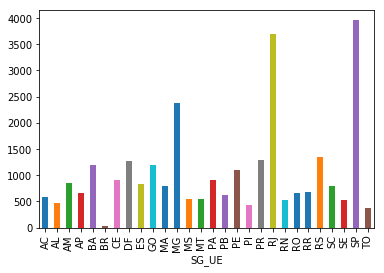

In [34]:
SG_UE.plot(kind='bar')
plt.show()

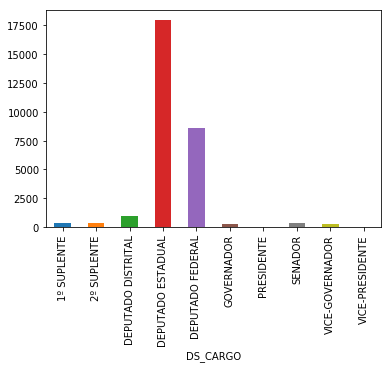

In [35]:
DS_CARGO.plot(kind='bar')
plt.show()

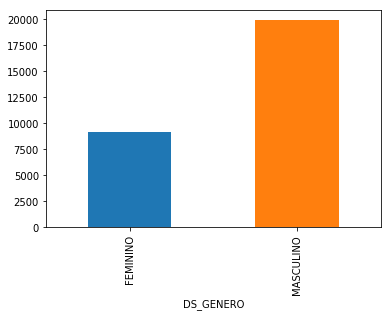

In [36]:
DS_GENERO.plot(kind='bar')
plt.show()

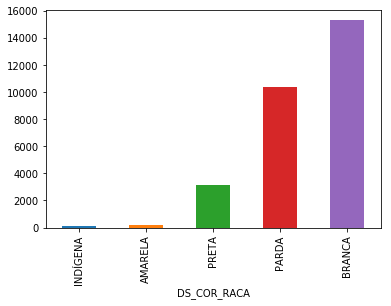

In [37]:
DS_COR_RACA.sort_values().plot(kind='bar', align='center')
plt.show()

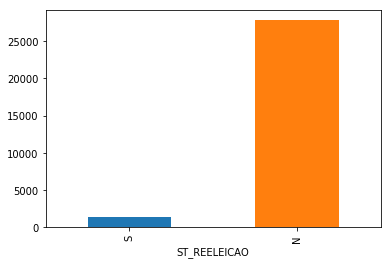

In [38]:
ST_REELEICAO.sort_values().plot(kind='bar')
plt.show()

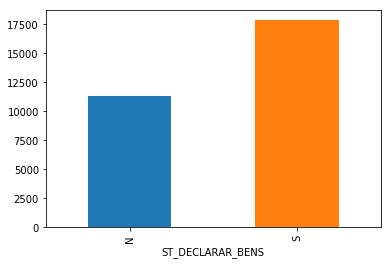

In [39]:
ST_DECLARAR_BENS.plot(kind='bar')
plt.show()

### 1.2.2 Do cruzamento dos dados de diferentes colunas

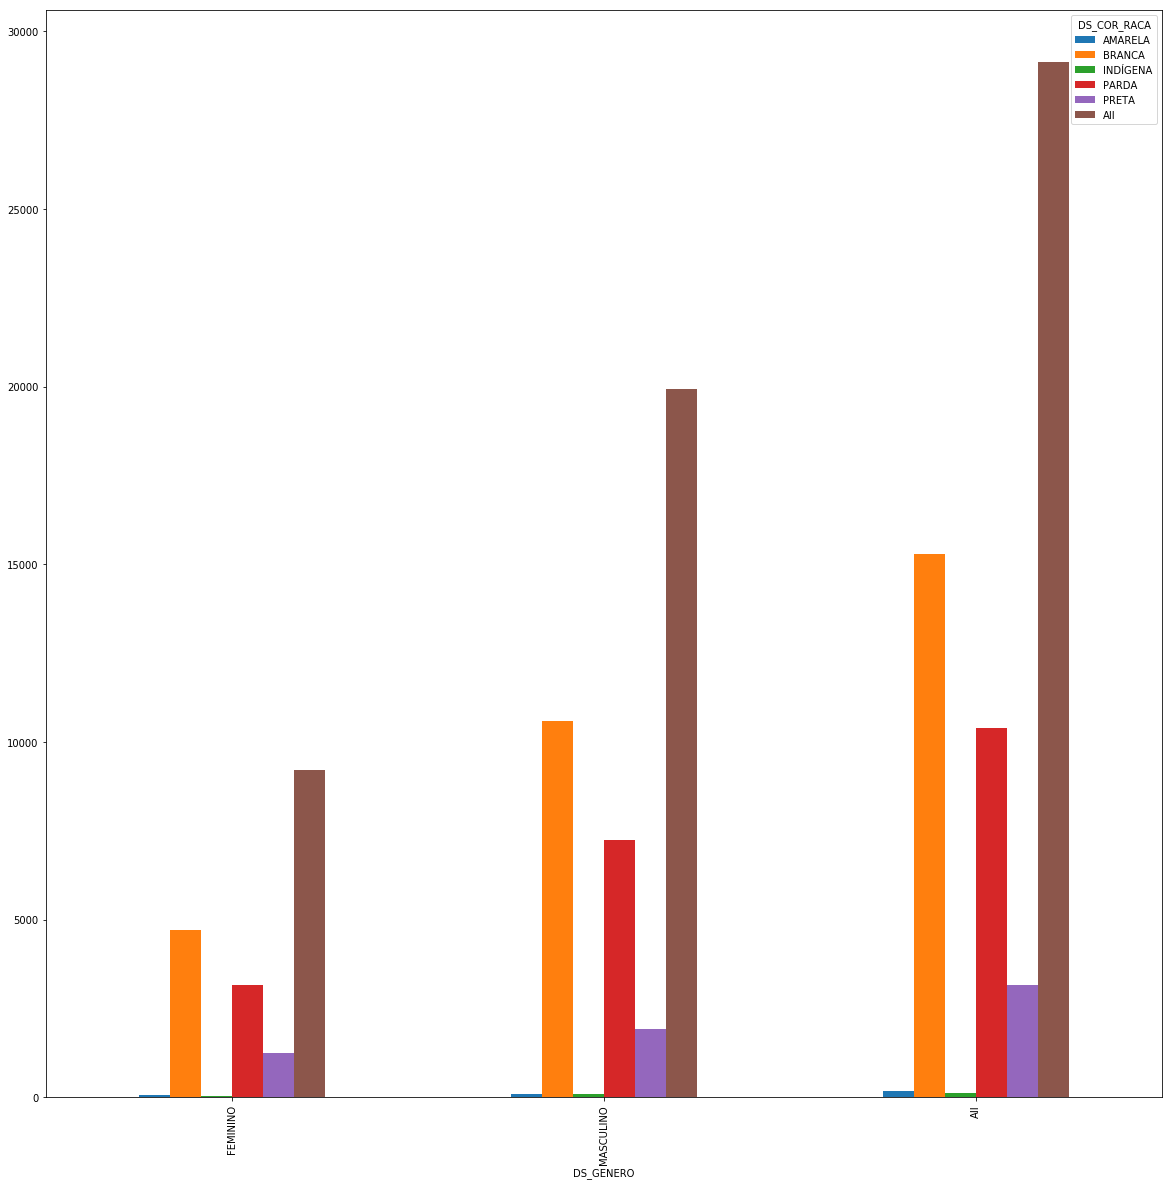

In [40]:
GENERO_RACA.plot(kind='bar', figsize=(20,20))
plt.show()

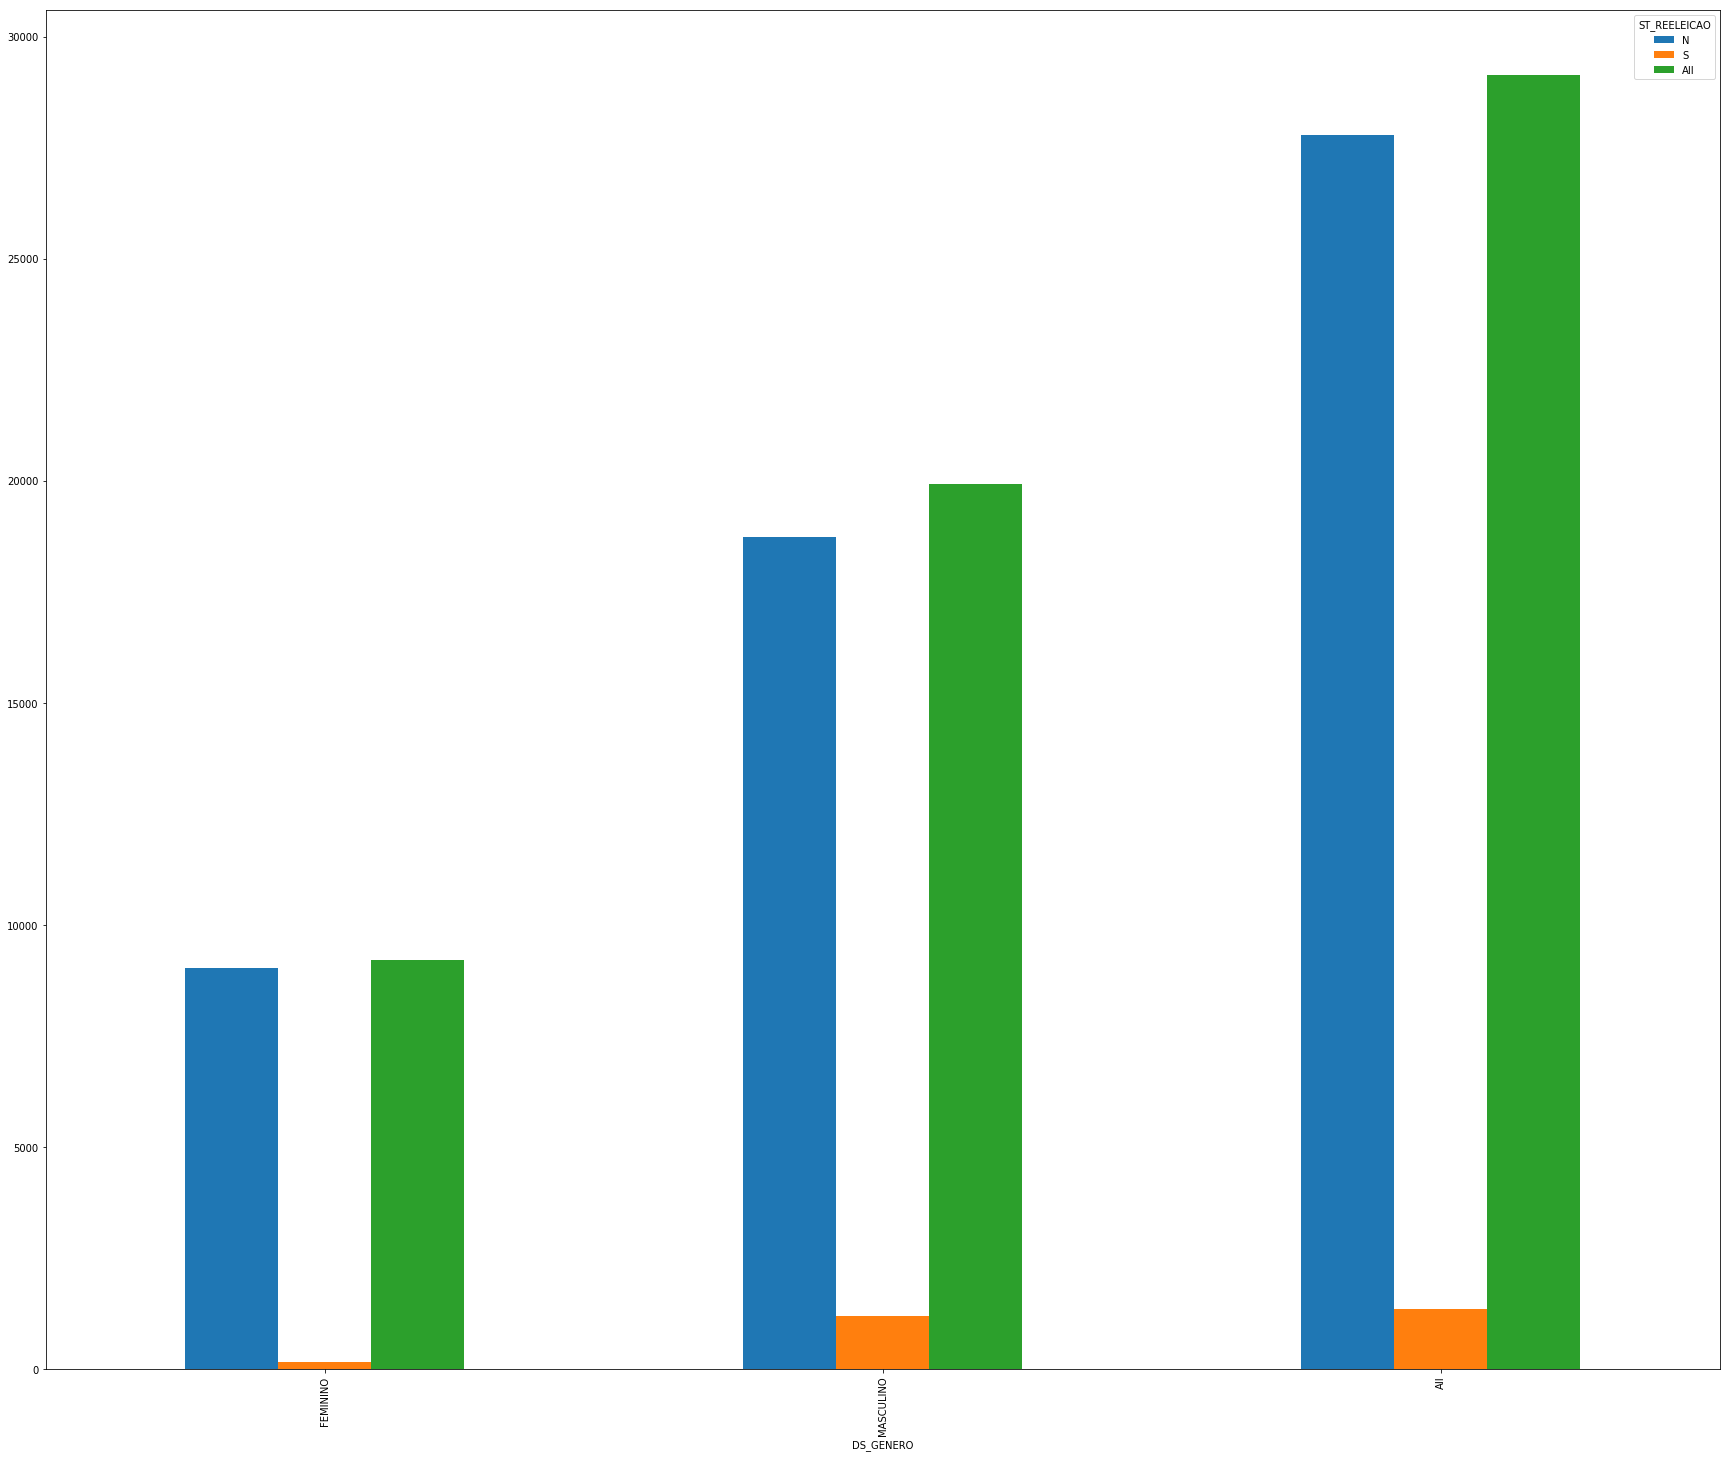

In [41]:
GENERO_REELEICAO.plot(kind='bar', figsize=(30,25))
plt.show()

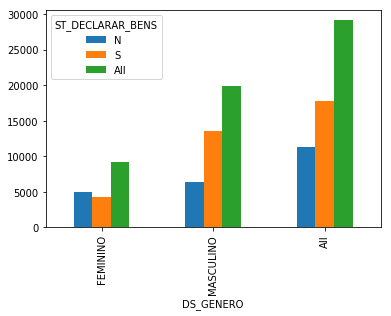

In [42]:
GENERO_DECLARAR_BENS.plot(kind='bar')
plt.show()

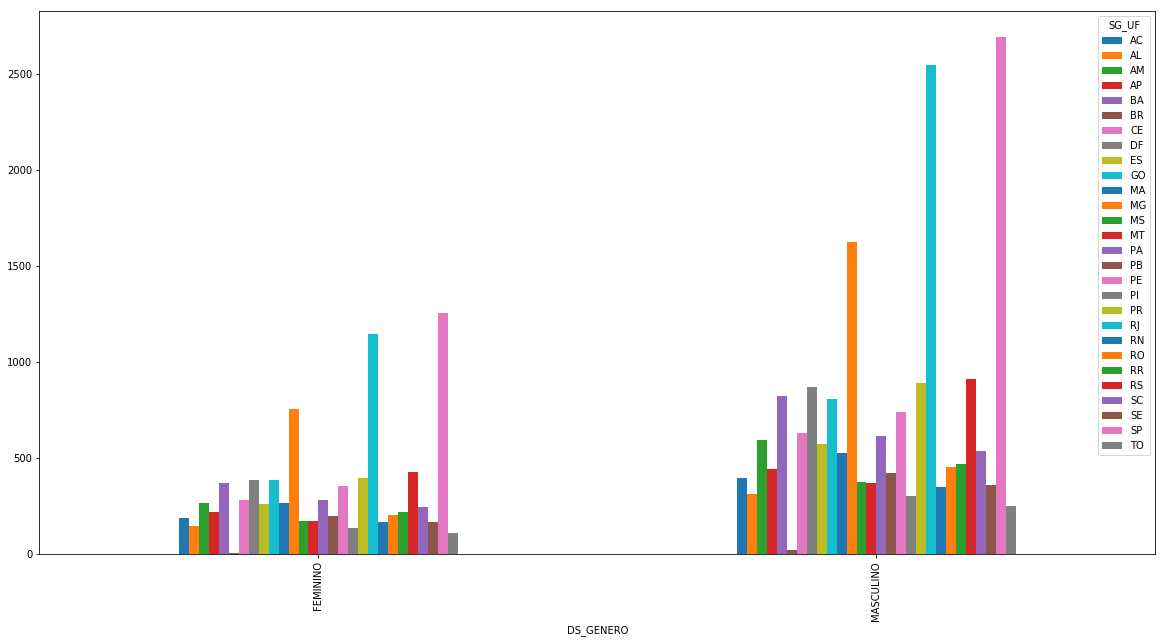

In [43]:
GENERO_UF.plot(kind='bar', figsize=(20,10))
plt.show()

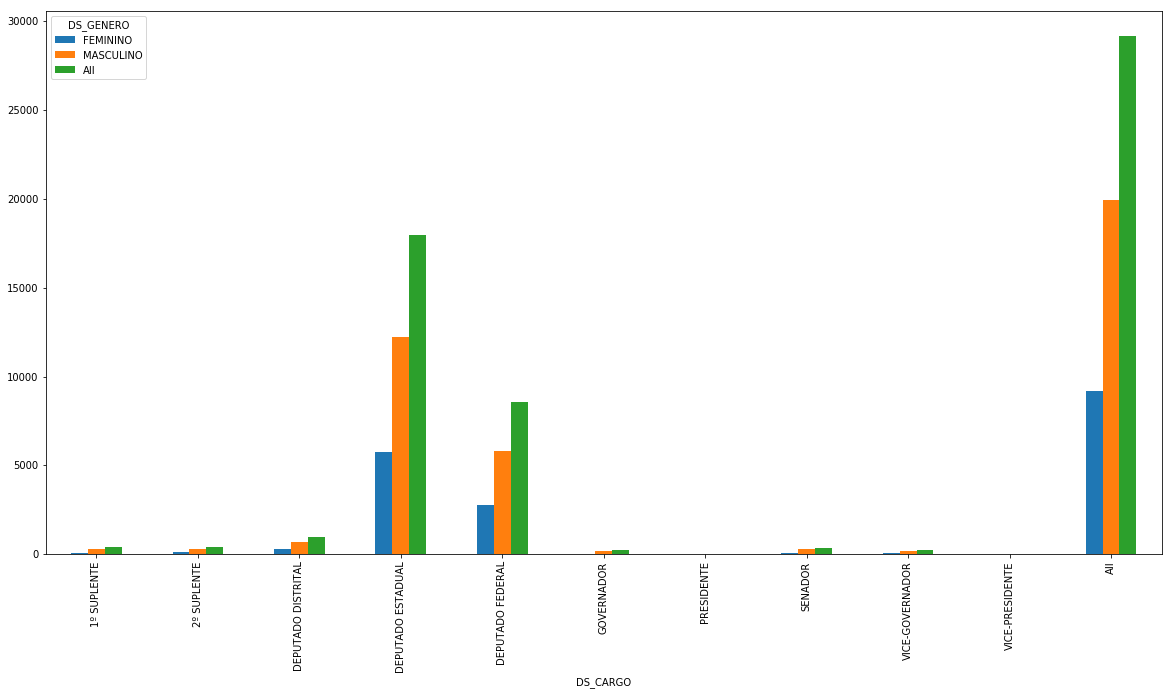

In [44]:
CARGO_GENERO.plot(kind='bar', figsize=(20,10))
plt.show()

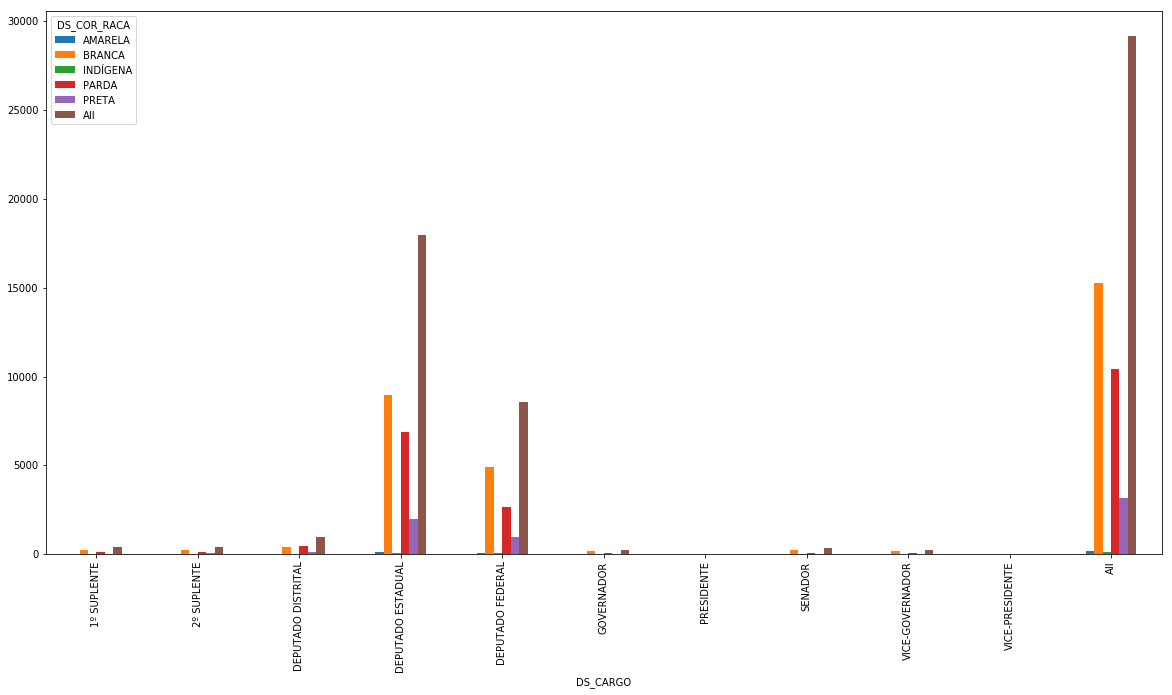

In [45]:
CARGO_RACA.plot(kind='bar', figsize=(20,10))
plt.show()

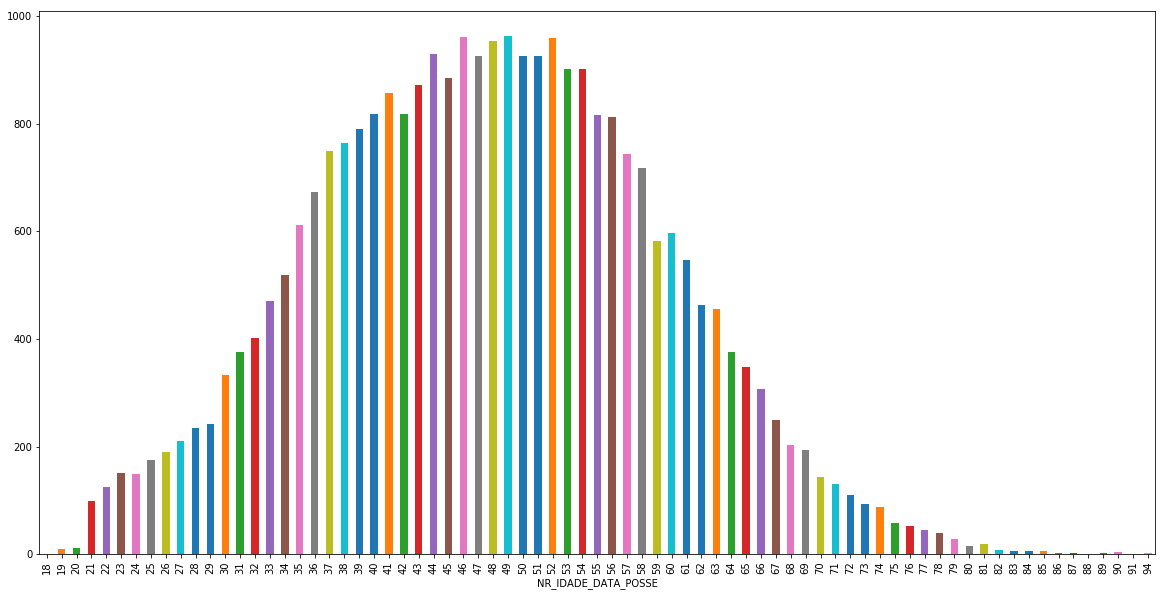

In [46]:
NR_IDADE_DATA.plot(kind='bar', figsize=(20,10))
plt.show()

## 1.3 Estatística Descritiva
---

### 1.3.1 Analisando a idade dos candidatos

Nessa fase vamos nos ater a analisar a idade dos candidatos na data da posse (01/01/2019)

Média

In [47]:
dataframe['NR_IDADE_DATA_POSSE'].mean()

47.77024430414494

Mediana

In [48]:
dataframe['NR_IDADE_DATA_POSSE'].median()

48.0

Moda

In [49]:
dataframe['NR_IDADE_DATA_POSSE'].mode()

0    49
dtype: int64

Amplitude

In [50]:
dataframe['NR_IDADE_DATA_POSSE'].max()

94

In [51]:
dataframe['NR_IDADE_DATA_POSSE'].min()

18

In [52]:
print(dataframe['NR_IDADE_DATA_POSSE'].max() - dataframe['NR_IDADE_DATA_POSSE'].min())

76


Variância

In [53]:
print(dataframe['NR_IDADE_DATA_POSSE'].var())

131.73762330098324


Desvio Padrão

In [54]:
print(dataframe['NR_IDADE_DATA_POSSE'].std())

11.477701133109507


Covariância e Correlação entre os dados

In [66]:
import seaborn as sns

Text(0.5,0.98,'')

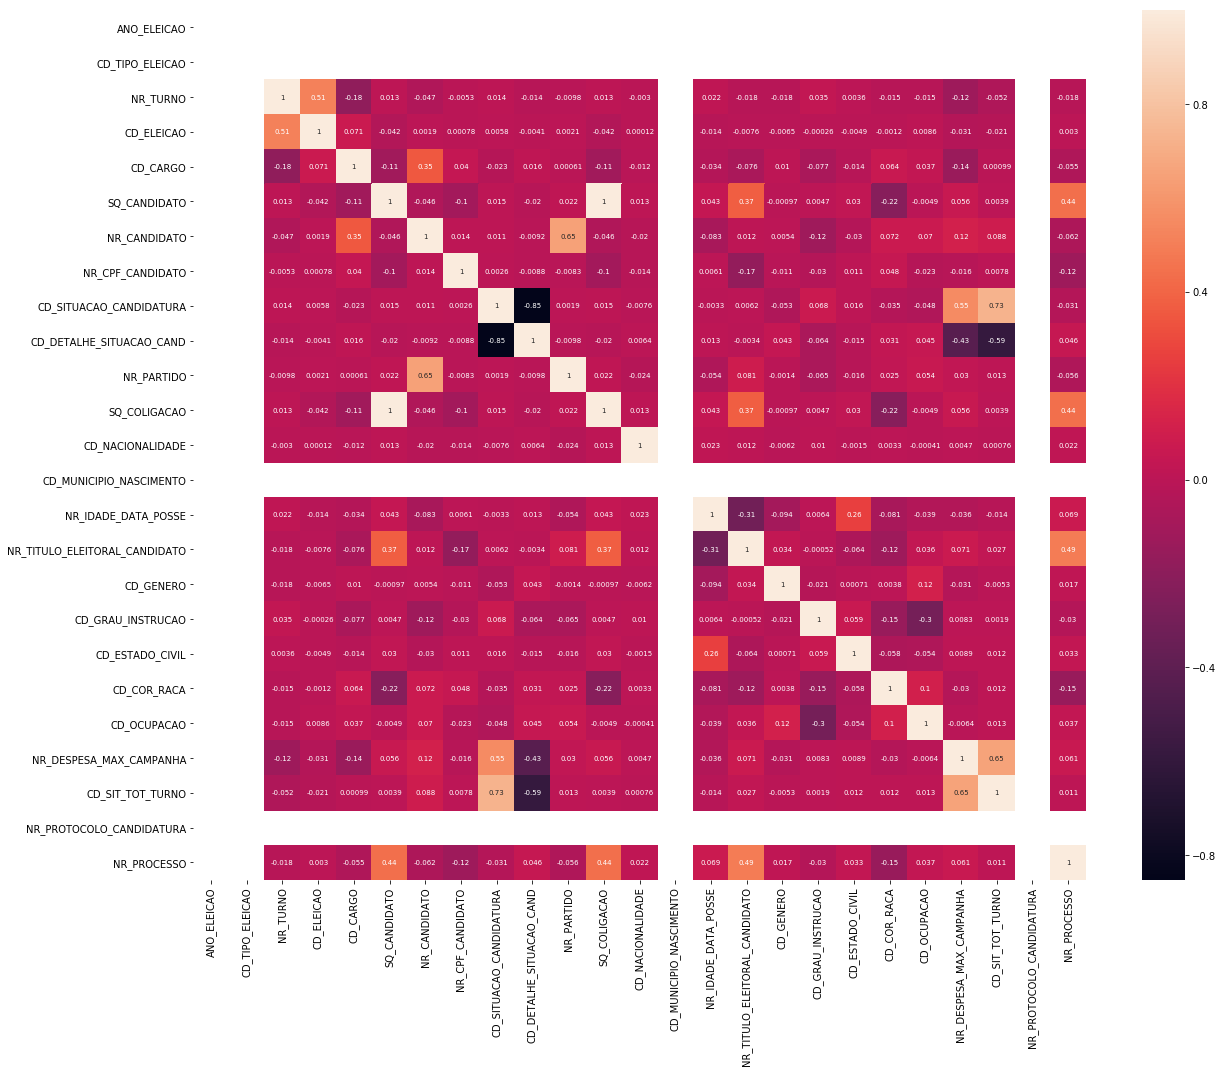

In [77]:
fig, (ax) = plt.subplots(1, 1, figsize=(20,16))

hm = sns.heatmap(dataframe.corr(), 
#                  vmin=0,
#                  vmax=1,
                 ax=ax,
                 annot=True, 
                 annot_kws={"size": 7}
                )

# fig.subplots_adjust(top=0.90)
fig.suptitle('', 
              fontsize=14, 
              fontweight='bold')

In [81]:
dataframe.cov()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NR_CPF_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,...,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,CD_COR_RACA,CD_OCUPACAO,NR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO
ANO_ELEICAO,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
CD_TIPO_ELEICAO,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
NR_TURNO,0.0,0.0,2.054575e-03,1.784588e-03,-6.902851e-03,4.290391e+07,-4.991986e+01,-7.278456e+06,1.593913e-03,-1.961962e-03,...,-5.908819e+07,-7.523645e-04,2.290847e-03,3.835338e-04,-6.675414e-04,-2.314397e-01,-1.815873e-03,-3.563434e-03,0.0,-9.321562e+12
CD_ELEICAO,0.0,0.0,1.784588e-03,5.901913e-03,4.559516e-03,-2.356434e+08,3.333719e+00,1.798797e+06,1.129027e-03,-9.672364e-04,...,-4.315886e+07,-4.622582e-04,-2.919431e-05,-8.765451e-04,-8.817633e-05,2.237126e-01,-7.710943e-04,-2.507522e-03,0.0,2.625889e+12
CD_CARGO,0.0,0.0,-6.902851e-03,4.559516e-03,7.059631e-01,-6.903544e+09,6.924839e+03,1.008443e+09,-4.886268e-02,4.187727e-02,...,-4.696537e+09,8.078759e-03,-9.394511e-02,-2.691592e-02,5.149192e-02,1.038066e+01,-3.711534e-02,1.267832e-03,0.0,-5.258584e+14
SQ_CANDIDATO,0.0,0.0,4.290391e+07,-2.356434e+08,-6.903544e+09,5.418372e+21,-7.966326e+13,-2.243488e+20,2.842478e+09,-4.484658e+09,...,2.026101e+21,-6.620074e+07,5.035214e+08,5.206908e+09,-1.572656e+10,-1.207335e+11,1.326911e+09,4.401364e+08,0.0,3.701915e+26
NR_CANDIDATO,0.0,0.0,-4.991986e+01,3.333719e+00,6.924839e+03,-7.966326e+13,5.420851e+08,9.656316e+12,6.542913e+02,-6.597689e+02,...,2.032384e+13,1.167983e+02,-4.025034e+03,-1.625989e+03,1.622519e+03,5.481714e+05,8.792107e+02,3.104515e+03,0.0,-1.655012e+19
NR_CPF_CANDIDATO,0.0,0.0,-7.278456e+06,1.798797e+06,1.008443e+09,-2.243488e+20,9.656316e+12,9.063287e+20,1.951811e+08,-8.161622e+08,...,-3.743601e+20,-2.974709e+08,-1.298031e+09,7.957802e+08,1.392298e+09,-2.358011e+11,-1.569764e+08,3.586840e+08,0.0,-4.206540e+25
CD_SITUACAO_CANDIDATURA,0.0,0.0,1.593913e-03,1.129027e-03,-4.886268e-02,2.842478e+09,6.542913e+02,1.951811e+08,6.368560e+00,-6.605683e+00,...,1.151691e+09,-1.239360e-01,2.519231e-01,9.236065e-02,-8.433118e-02,-4.118375e+01,4.512425e-01,2.800912e+00,0.0,-8.946605e+14
CD_DETALHE_SITUACAO_CAND,0.0,0.0,-1.961962e-03,-9.672364e-04,4.187727e-02,-4.484658e+09,-6.597689e+02,-8.161622e+08,-6.605683e+00,9.424304e+00,...,-7.698836e+08,1.238243e-01,-2.861275e-01,-1.078167e-01,9.129903e-02,4.684099e+01,-4.262354e-01,-2.751589e+00,0.0,1.616352e+15


Text(0.5,0.98,'')

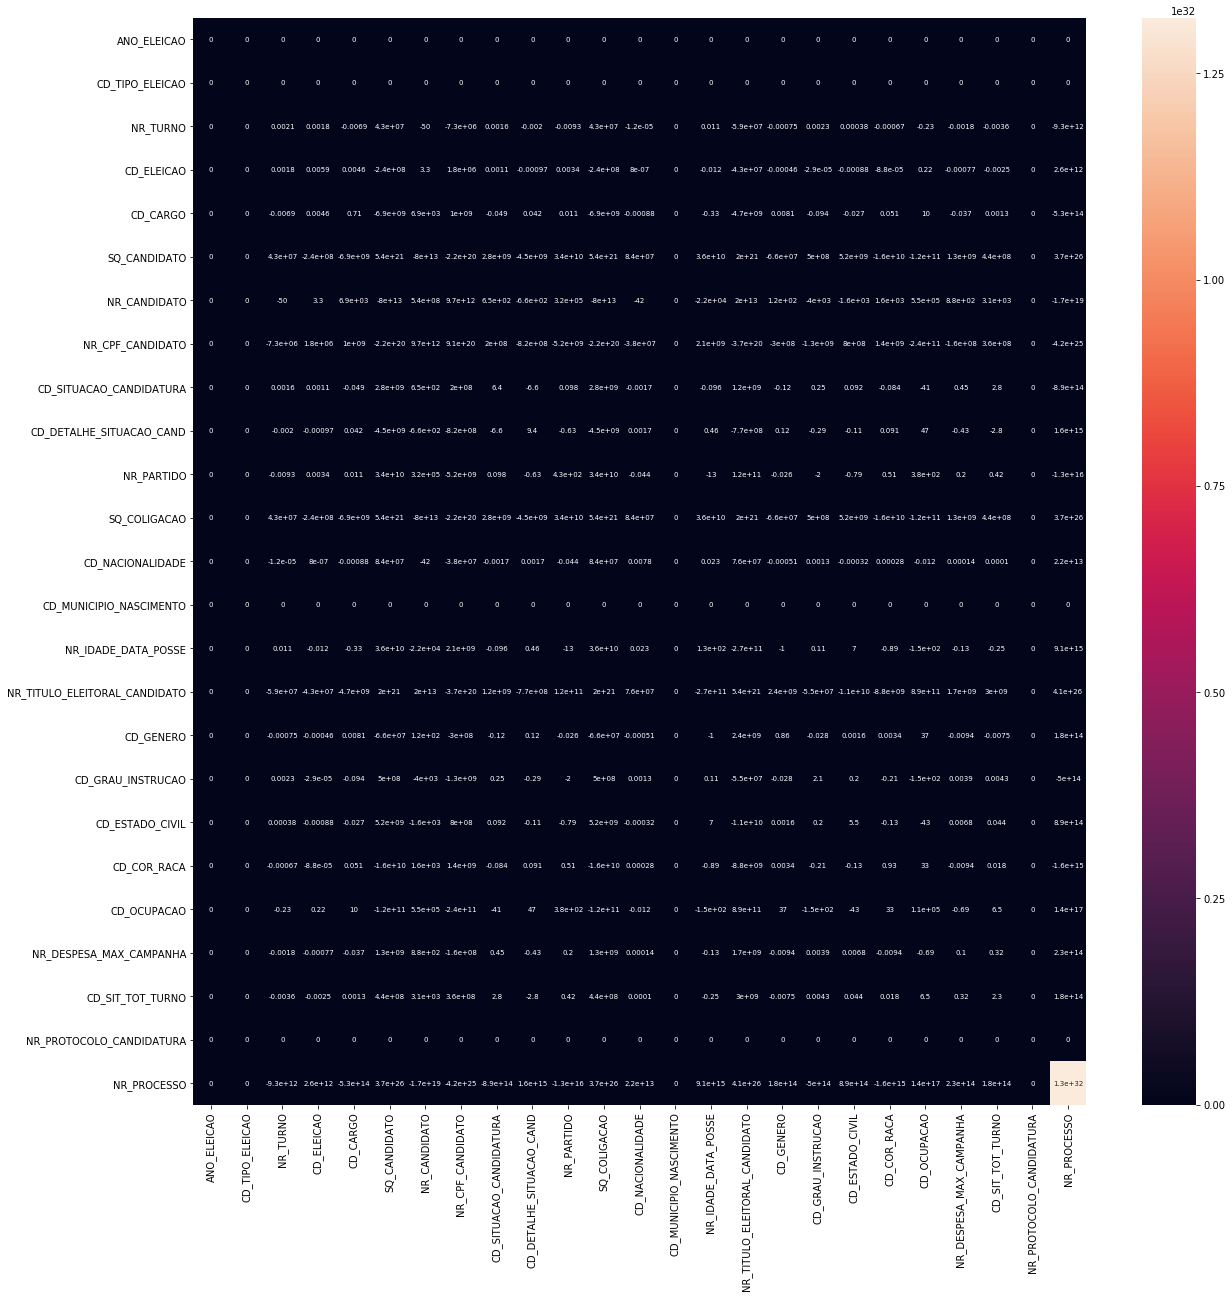

In [83]:
fig, (ax) = plt.subplots(1, 1, figsize=(20,20))

hm = sns.heatmap(dataframe.cov(), 
#                  vmin=0,
#                  vmax=1,
                 ax=ax,
                 annot=True, 
                 annot_kws={"size": 7}
                )

# fig.subplots_adjust(top=0.90)
fig.suptitle('', 
              fontsize=14, 
              fontweight='bold')